In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../../../programs/vssc3_scripts/') 
import scdtv
figure_directory = 'experience_3' 
if not os.path.exists(figure_directory) : os.makedirs(figure_directory)   

# Delays Analysis
The delays are measured at 4 levels in the EEW pipeline. Namely, there are:
- waveforms data acquisition, 
- amplitudes envelopes,
- waves arrivals picks,
- origines.

We first need an inventory with all station informations to analyse the delay in term of all variables in the station settings. The inventory used for seiscomp3 need to be extended with a table that includes telemetry, datalogger and sensor descriptions.

In [3]:
inventory = scdtv.boost_inventory()

`inventory` now contains the inventory installed in seiscomp at sc-local-proc-1 and the station informations. 
## Waveforms delays
The waveform delays coming from sc-acquisition-1 have been sampled during an hour on sc-local-proc-2 on 2016/11/17. 

In [4]:
fin = '/Users/fmassin/Google Drive/Projects/SED-EEW/INETER/system-maintenance/delays/experience_3/data/192.168.44.177/2016-11-17_19-30-28_data_latencies_1hrs.sqlite3'

### Waveform delays as a function of networks

<IPython.core.display.Javascript object>


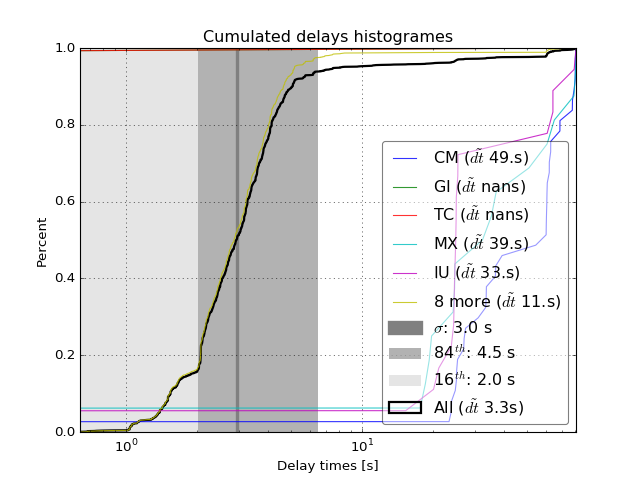

In [29]:
delays = scdtv.get_data_latencies(fin)
inventories=scdtv.hist(delays, inventory=inventory,  networks=['*'], hists='c', norms_hists=True)#, fout='test')

We will focus on the **NU** network.
### Waveform delays as a function of sampling rates

In [8]:
delays = scdtv.get_data_latencies(fin, networks=['NU'])

`delays` now containes the waveform delays of network **NU**.

<IPython.core.display.Javascript object>


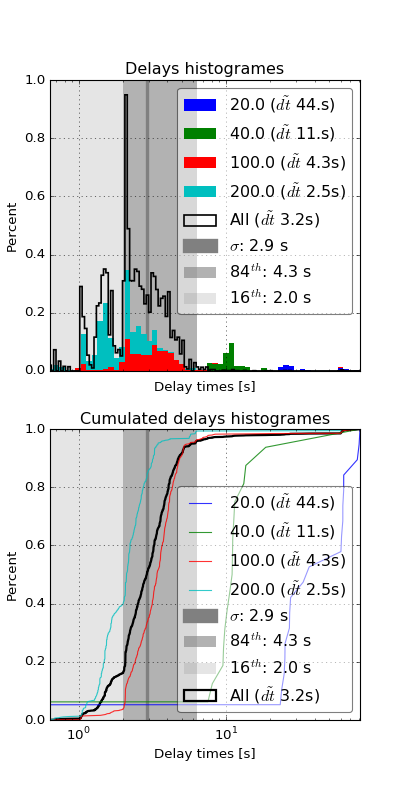

In [28]:
reload(scdtv)

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5,10))
inventories=scdtv.hist(delays, inventory=inventory,  sample_rates=['*'], hists_types='barstacked',hists='', ax=ax1,norms_hists=True)#, fout='test')
inventories=scdtv.hist(delays, inventory=inventory,  sample_rates=['*'], hists='c', norms_hists=True, ax=ax2)

### Waveform delays as a function of sensors

<IPython.core.display.Javascript object>


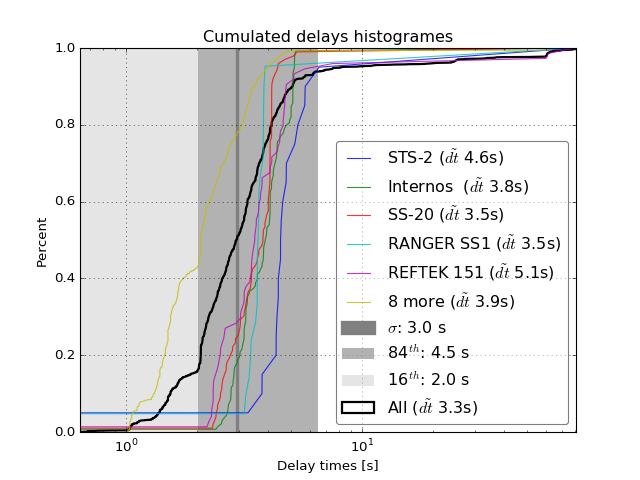

In [21]:
inventories = scdtv.hist(delays, inventory=inventory,  sensors=['*'], hists='c', norms_hists=True)#, fout='test')

The sub-network of `STS-2` (printed below) seems to produce significately slower. It does include one **HH** component. 

In [24]:
print(inventories[0])

Inventory created at 2016-11-18T22:11:02.000000Z
	Sending institution: STS-2 ($\~{dt}$ 4.6s) (INETER)
	Contains:
		Networks (1):
			GE
		Stations (1):
			GE.BOAB (INETER/GEOFON Station Boaco, Nicaragua)
		Channels (12):
			GE.BOAB..BHE, GE.BOAB..BHN, GE.BOAB..BHZ, GE.BOAB..HHE,
			GE.BOAB..HHN, GE.BOAB..HHZ, GE.BOAB..LHE, GE.BOAB..LHN,
			GE.BOAB..LHZ, GE.BOAB..VHE, GE.BOAB..VHN, GE.BOAB..VHZ


### waveform delays as a function of data loggers

<IPython.core.display.Javascript object>


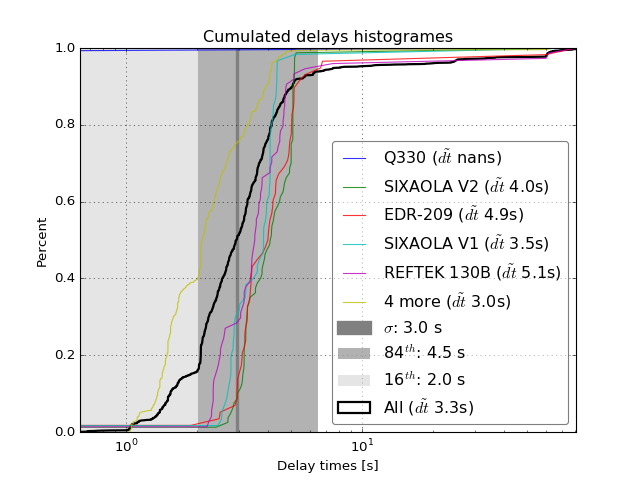

In [30]:
inventories=scdtv.hist(delays, inventory=inventory,  data_loggers=['*'], hists='c', norms_hists=True)

### Waveform delays as a function of telemetries

<IPython.core.display.Javascript object>


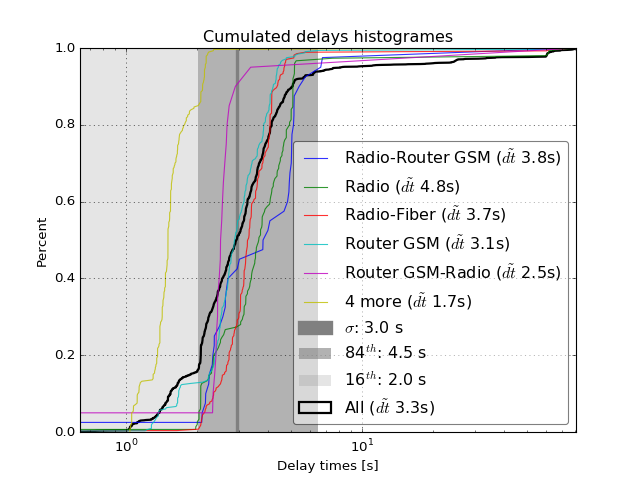

In [31]:
inventories=scdtv.hist(delays, inventory=inventory,  telemetries=['*'], hists='c', norms_hists=True)

### In map view
The `Radio-Router GSM` network is in a remote area, it is not of big importance for EEW.

<IPython.core.display.Javascript object>


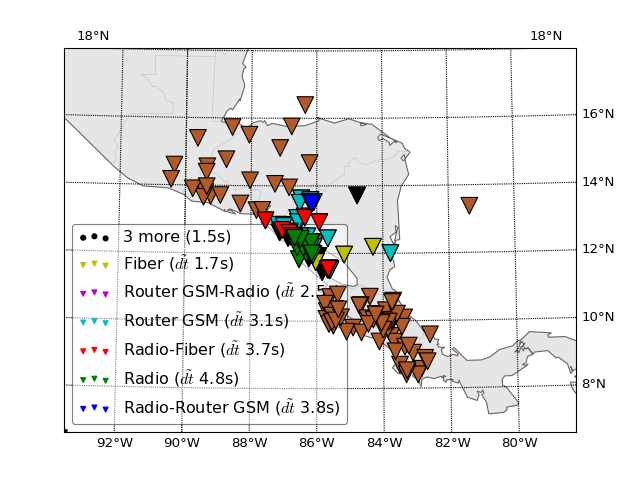

In [37]:
inventories_keep=inventories=scdtv.maps(delays, inventory=inventory,  telemetries=['*'])#, saves=True)

<IPython.core.display.Javascript object>


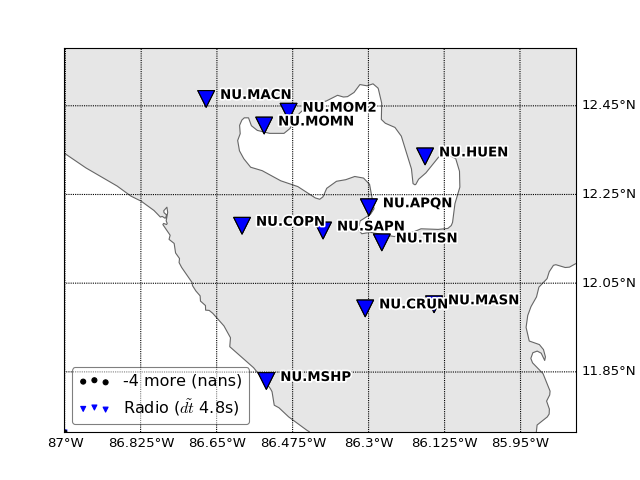

In [38]:
inventories=scdtv.maps(delays, inventory=inventories_keep[1],  telemetries=['*'], resolution='h')

But the `Radio` network is in the central area. And, as shown below, it includes **EH** and **HH** components. It is a very important portion of the **NU** network and it could be better. 

In [39]:
print(inventories_keep[1])

Inventory created at 2016-11-18T22:11:02.000000Z
	Sending institution: Radio ($\~{dt}$ 4.8s) (INETER)
	Contains:
		Networks (1):
			NU
		Stations (11):
			NU.APQN (BB Volcan Apoyeque, Nicaragua)
			NU.COPN (Copaltepe)
			NU.CRUN (El Crucero)
			NU.HUEN (BB Puenta Huete, Nicaragua)
			NU.MACN (El Madrono, SAT Cerro Negro)
			NU.MASN (Volcan Masaya, Nicaragua)
			NU.MOM2 (El cardon, Momotombo, NIcaragua)
			NU.MOMN (al SSO del Volcan Momtombo)
			NU.MSHP (Al O del Volcan Concepcion)
			NU.SAPN (BB Ciudad Sandino San Andres de las Palancas, Nicaragua)
			NU.TISN (Estado Mayor, Ejercito Nacional)
		Channels (27):
			NU.APQN..HHE_select, NU.APQN..HHN_select, NU.APQN..HHZ_select,
			NU.COPN.00.EHZ_select, NU.CRUN.00.EHZ_select, NU.HUEN..HHE_select,
			NU.HUEN..HHN_select, NU.HUEN..HHZ_select, NU.MACN.00.EHE_select,
			NU.MACN.00.EHN_select, NU.MACN.00.EHZ_select,
			NU.MASN.50.EHE_select, NU.MASN.50.EHN_select,
			NU.MASN.50.EHZ_select, NU.MOM2.00.EHE_select,
			NU.MOM2.00.EHN_select, NU.MOM

The observations above should be consistent with envelope and pick delays.
## Envelope delays